# 분산도

- 자료가 대표치를 중심으로 얼마나 밀집 또는 분산되어 있는가를 나타내는 수치 
- 산포도가 큰 자료는 변동이 크다는 것을 의미하며 변동이 크다는 것은 통계적 추론 과정에서 불확실성과 위험이 크다는 것
- 산포도 사례 :  범위, 분산과 표준편차, 사분위편차, 변동계수 등

## 1. random data 형성

### 1-1 라이브러리

In [8]:
# 필요한 라이브러리 호출
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rc

# Windows 기본 한글 폰트 설정
rc('font', family='Malgun Gothic')  # '맑은 고딕' 사용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

### 1-2 랜덤 data 생성

In [10]:
# 데이터 랜덤하게 형성 (seed 부여)
np.random.seed(1)

# 12개월 동안 발생한 A사 판매 건수라고 가정 (중심도 이해와 동일)
X = np.random.randint(1,20,12)
print(X)

[ 6 12 13  9 10 12  6 16  1 17  2 13]


### 1-3 분산도 이해

#### 1) 범위

In [11]:
# 오름차순 정렬
tmp_data = sorted(X)
print(f'오름차순 정렬한 값 : {tmp_data}')

# 최솟값과 최댓값 출력
print(f'최소값 : {tmp_data[0]}')
print(f'최댓값 : {tmp_data[-1]}')

오름차순 정렬한 값 : [1, 2, 6, 6, 9, 10, 12, 12, 13, 13, 16, 17]
최소값 : 1
최댓값 : 17


In [12]:
# max, min 매서드 활용
print(f'특정 지역 A의 범죄 건수 데이터 : {X.tolist()}')

print(f'최솟값 : {min(X)}')
print(f'최댓값 : {max(X)}')

# 따라서 범위는 최댓값 - 최솟값으로 출력할 수 있음.
print(f'A 회사의 월별 판매 건수 데이터의 범위는 최소 {min(X)}에서 최대 {max(X)}로 {round(max(X) - min(X),2)}의 범위를 가지고 있습니다.')


특정 지역 A의 범죄 건수 데이터 : [6, 12, 13, 9, 10, 12, 6, 16, 1, 17, 2, 13]
최솟값 : 1
최댓값 : 17
A 회사의 월별 판매 건수 데이터의 범위는 최소 1에서 최대 17로 16의 범위를 가지고 있습니다.


#### 2) 분산

In [13]:
n = len(X)
m = X.mean()

# 제곱을 해주는 매서드 pow를 활용하여 편차의 제곱 도출
# 편차 = 변량 - 평균
print(pow(X-m, 2))
resid = pow(X-m, 2)

# 제곱합을 한 후, 변량의 개수로 나눠주면 분산 도출
print(f'편차의 제곱합의 평균, 즉 분산은 {sum(resid)/n}입니다.')

[1.40625e+01 5.06250e+00 1.05625e+01 5.62500e-01 6.25000e-02 5.06250e+00
 1.40625e+01 3.90625e+01 7.65625e+01 5.25625e+01 6.00625e+01 1.05625e+01]
편차의 제곱합의 평균, 즉 분산은 24.020833333333332입니다.


In [14]:
# numpy를 이용한 분산값 도출
np.var(X)

24.020833333333332

#### 3) 표쥰편차

In [15]:
# 표준편차는 분산의 제곱근입니다.
print(pow(np.var(X),1/2))

# numpy의 std 매서드를 활용한 표준편차 도출
print(np.std((X)))

4.90110531751087
4.90110531751087


#### 4) 왜도

In [16]:
# 변수 설정
n = len(X)
m = X.mean()
std = np.std(X)

# 편차/표쥰편차 값에 3제곱 시행 
tmp_result = pow((X - m)/std, 3)
print(f'편차/표쥰편차의 3제곱 : {tmp_result.tolist()}')

# 3제곱 한 값을 더하고 데이터 개수만큼 나누면 왜도 도출
result = sum(tmp_result)/n
print(f'왜도 : {result}')

편차/표쥰편차의 3제곱 : [-0.44793159673025457, 0.09675322489373499, 0.29158687941225747, -0.003583452773842037, 0.00013272047310526058, 0.09675322489373499, -0.44793159673025457, 2.0737573922696972, -5.690390284388049, 3.236919618564201, -3.9538756142788194, 0.29158687941225747]
왜도 : -0.3713518837485193


#### 5) 첨도

In [17]:
# 변수 설정
n = len(X)
m = X.mean()
std = np.std(X)

# 편차/표준편차의 4제곱 시행
tmp_result = pow(((X - m) / std), 4)
print(f'편차/표쥰편차의 4제곱 : {tmp_result.tolist()}')

# 4제곱 한 값을 더하고 데이터 개수만큼 나누고 -3을 하면 첨도 도출
result = sum(tmp_result)/n - 3
print(f'첨도 : {result}')

편차/표쥰편차의 4제곱 : [0.34272748266334907, 0.04441748175317004, 0.19335584458958832, 0.0005483639722613585, 6.7699255834735595e-06, 0.04441748175317004, 0.34272748266334907, 2.6445021810443605, 10.159119578700013, 4.788239736604764, 6.252168444775088, 0.19335584458958832]
첨도 : -0.9162011089138096


In [14]:
# 라이브러리 import로 구한 kurtosis
from scipy.stats import kurtosis

kurtosis(X)

-0.9162011089138105

## 2. 리스트 데이터 

In [18]:
import numpy as np
from scipy.stats import skew, kurtosis

# 데이터 정의
data = [50, 60, 70, 80, 90, 90]

# 범위 (Range)
data_range = max(data) - min(data)

# 분산 (Variance)
data_variance = np.var(data, ddof=1)  # ddof=1: 표본 분산

# 표준편차 (Standard Deviation)
data_std_dev = np.std(data, ddof=1)  # ddof=1: 표본 표준편차

# 왜도 (Skewness)
data_skewness = skew(data)

# 첨도 (Kurtosis) : Fisher 첨도
data_kurtosis = kurtosis(data)

# 결과 출력
print(f"범위 (Range): {data_range}")
print(f"분산 (Variance): {data_variance}")
print(f"표준편차 (Standard Deviation): {data_std_dev}")
print(f"왜도 (Skewness): {data_skewness}")
print(f"첨도 (Kurtosis): {data_kurtosis}")


범위 (Range): 40
분산 (Variance): 266.6666666666667
표준편차 (Standard Deviation): 16.32993161855452
왜도 (Skewness): -0.27950849718747256
첨도 (Kurtosis): -1.3650000000000007


- Pearson 첨도 사례

In [20]:
import numpy as np
from scipy.stats import skew, kurtosis

# 데이터 정의
data = [50, 60, 70, 80, 90, 90]

# 범위 (Range)
data_range = max(data) - min(data)

# 분산 (Variance)
data_variance = np.var(data, ddof=1)  # ddof=1: 표본 분산

# 표준편차 (Standard Deviation)
data_std_dev = np.std(data, ddof=1)  # ddof=1: 표본 표준편차

# 왜도 (Skewness)
data_skewness = skew(data)

# 첨도 (Kurtosis)
# kurtosis(data, fisher=False)를 사용하면 Fisher 첨도가 아닌 Pearson 첨도를 반환 
data_kurtosis = kurtosis(data, fisher=False)

# 결과 출력
print(f"범위 (Range): {data_range}")
print(f"분산 (Variance): {data_variance}")
print(f"표준편차 (Standard Deviation): {data_std_dev}")
print(f"왜도 (Skewness): {data_skewness}")
print(f"첨도 (Kurtosis): {data_kurtosis}")

범위 (Range): 40
분산 (Variance): 266.6666666666667
표준편차 (Standard Deviation): 16.32993161855452
왜도 (Skewness): -0.27950849718747256
첨도 (Kurtosis): 1.6349999999999993


In [21]:
import numpy as np
from scipy.stats import kurtosis

# 데이터 정의
data = [50, 60, 70, 80, 90, 90]

# Fisher 첨도 (기본 kurtosis 함수)
fisher_kurtosis = kurtosis(data)

# Pearson 첨도 (Fisher 첨도 + 3)
pearson_kurtosis = kurtosis(data, fisher=False)

# 결과 출력
print(f"Fisher 첨도 (초과 첨도): {fisher_kurtosis}")
print(f"Pearson 첨도 (전체 첨도): {pearson_kurtosis}")


Fisher 첨도 (초과 첨도): -1.3650000000000007
Pearson 첨도 (전체 첨도): 1.6349999999999993


## 3. 딕셔너리 데이터

- 데이터 정의:데이터는 딕셔너리 형태로 그룹별 값 리스트를 저장합니다. 각 그룹에 대해 통계량을 계산합니다.

In [32]:
import numpy as np
from scipy.stats import skew, kurtosis

# 딕셔너리 데이터 정의
data_dict = {
    "Group A": [50, 60, 70, 80, 90, 90],
    "Group B": [30, 45, 50, 55, 60, 65],
    "Group C": [100, 110, 115, 120, 130, 135]
}

# 결과 저장용 딕셔너리
results = {}

# 딕셔너리 데이터 순회
for group, data in data_dict.items():
    # 분산
    variance = np.var(data, ddof=1)  # ddof=1: 표본 분산
    # 표준편차
    std_dev = np.std(data, ddof=1)  # ddof=1: 표본 표준편차
    # 왜도
    skewness = skew(data)
    # 첨도
    kurt = kurtosis(data)  # Fisher 첨도 (기본)
    
    # 결과 저장
    results[group] = {
        "Variance": variance,
        "Standard Deviation": std_dev,
        "Skewness": skewness,
        "Kurtosis": kurt
    }

# 결과 출력
for group, stats in results.items():
    print(f"{group} Statistics:")
    for stat_name, stat_value in stats.items():
        print(f"  {stat_name}: {stat_value}")


Group A Statistics:
  Variance: 266.6666666666667
  Standard Deviation: 16.32993161855452
  Skewness: -0.27950849718747256
  Kurtosis: -1.3650000000000007
Group B Statistics:
  Variance: 154.16666666666669
  Standard Deviation: 12.416387021459451
  Skewness: -0.6358612947838342
  Kurtosis: -0.6049963476990499
Group C Statistics:
  Variance: 166.66666666666669
  Standard Deviation: 12.909944487358057
  Skewness: -0.05656854249492252
  Kurtosis: -1.1544000000000003


## 4. 삼성전자 데이터

### 4-1 데이터 불러오기

In [24]:
import yfinance as yf
import numpy as np
import pandas as pd

# 삼성전자 일별 데이터 가져오기
ticker = "005930.KS"
samsung = yf.download(ticker, start="2023-01-01", end="2023-12-31")



[*********************100%***********************]  1 of 1 completed


In [25]:
samsung

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS
Date,,,,,,
2023-01-02 00:00:00+00:00,53576.582031,55500.0,56100.0,55200.0,55500.0,10031448
2023-01-03 00:00:00+00:00,53480.046875,55400.0,56000.0,54500.0,55400.0,13547030
2023-01-04 00:00:00+00:00,55796.867188,57800.0,58000.0,55600.0,55700.0,20188071
2023-01-05 00:00:00+00:00,56183.003906,58200.0,58800.0,57600.0,58200.0,15682826
2023-01-06 00:00:00+00:00,56955.285156,59000.0,59400.0,57900.0,58300.0,17334989
...,...,...,...,...,...,...
2023-12-21 00:00:00+00:00,73566.117188,75000.0,75000.0,74300.0,74600.0,13478766
2023-12-22 00:00:00+00:00,74448.914062,75900.0,76300.0,75400.0,75800.0,14515608


### 4-2 수익률의 평균과 분산

In [26]:
# 종가 데이터
samsung['Daily Return'] = samsung['Close'].pct_change()  # 종가 수익률 계산

# 수익률 평균과 분산 계산
mean_return = samsung['Daily Return'].mean()  # 평균
variance_return = samsung['Daily Return'].var()  # 분산

# 결과 출력
print(f"종가 수익률 평균: {mean_return:.6f}")
print(f"종가 수익률 분산: {variance_return:.6f}")

# 수익률 데이터와 통계 출력
print(samsung[['Close', 'Daily Return']].head())


종가 수익률 평균: 0.001509
종가 수익률 분산: 0.000176
Price                         Close Daily Return
Ticker                    005930.KS             
Date                                            
2023-01-02 00:00:00+00:00   55500.0          NaN
2023-01-03 00:00:00+00:00   55400.0    -0.001802
2023-01-04 00:00:00+00:00   57800.0     0.043321
2023-01-05 00:00:00+00:00   58200.0     0.006920
2023-01-06 00:00:00+00:00   59000.0     0.013746


In [27]:
std_dev_return = samsung['Daily Return'].std()
print(f"종가 수익률 표준편차: {std_dev_return:.6f}")


종가 수익률 표준편차: 0.013281


In [28]:
import pandas as pd
import numpy as np
import yfinance as yf

# 삼성전자 티커 심볼
ticker = '005930.KS'

# 데이터 가져오기 (시작일과 종료일 설정)
start_date = '2023-01-01'
end_date = '2024-11-19'  # 오늘 날짜로 설정

# 주가 데이터 다운로드
df = yf.download(ticker, start=start_date, end=end_date)

# 종가(Close) 열을 사용하여 수익률 계산
df['Return'] = df['Close'].pct_change()

# 결측값 제거 (첫 번째 수익률은 NaN이므로 제거)
df = df.dropna()

# 수익률의 분산 계산
variance = np.var(df['Return'])

print(f"삼성전자 주식 수익률의 분산: {variance}")


[*********************100%***********************]  1 of 1 completed

삼성전자 주식 수익률의 분산: 0.0002921171957720835


### 4-3 수익률 분산 연환산

In [29]:
import pandas as pd
import numpy as np

# 예시로 주식 가격 데이터 생성
# 실제로는 Yahoo Finance나 다른 API에서 주가 데이터를 가져올 수 있습니다.
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05'],
    'Price': [100, 102, 101, 105, 107]
}

# 데이터프레임 생성
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

# 주가 수익률 계산
# 수익률 = (오늘 가격 - 어제 가격) / 어제 가격
df['Return'] = df['Price'].pct_change()

# 결측값 제거 (첫 번째 수익률은 NaN이므로 제거)
df = df.dropna()

# 일별 수익률의 분산 계산
daily_variance = np.var(df['Return'])

# 연간 수익률의 분산 계산 (일별 수익률을 기준으로)
annual_variance = daily_variance * 252

print(f"주식 일별 수익률의 분산: {daily_variance}")
print(f"주식 연간 수익률의 분산: {annual_variance}")


주식 일별 수익률의 분산: 0.00031060058745968876
주식 연간 수익률의 분산: 0.07827134803984157


In [30]:
print(samsung['Daily Return'].describe())


count    244.000000
mean       0.001509
std        0.013281
min       -0.030016
25%       -0.006945
50%        0.000688
75%        0.007937
max        0.061286
Name: Daily Return, dtype: float64


### 4-4 시각화

[*********************100%***********************]  1 of 1 completed


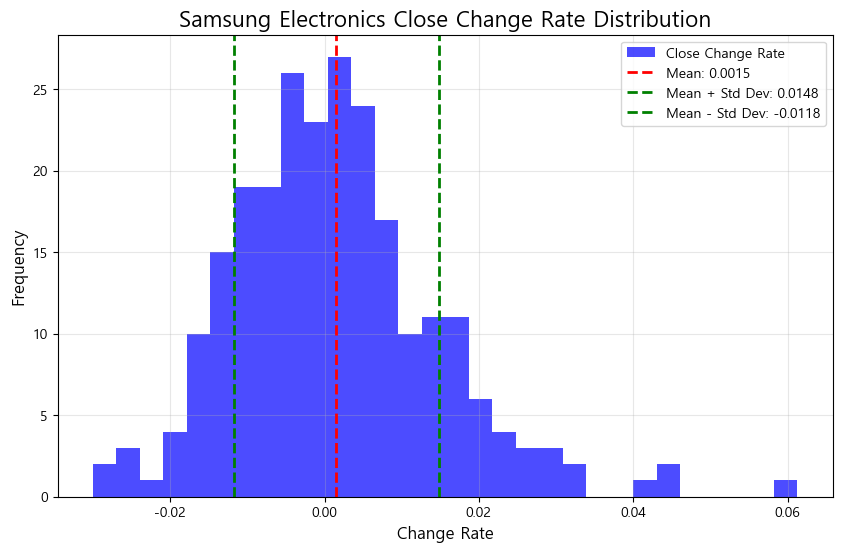

In [34]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 삼성전자 일별 데이터 가져오기
ticker = "005930.KS"
samsung = yf.download(ticker, start="2023-01-01", end="2023-12-31")

# Close 열의 변화율 계산
samsung['Close_Change_Rate'] = samsung['Close'].pct_change()

# 변화율 데이터 정리
change_rate = samsung['Close_Change_Rate'].dropna()

# 분산과 표준편차 계산
variance = np.var(change_rate, ddof=1)
std_dev = np.std(change_rate, ddof=1)
mean_rate = np.mean(change_rate)

# 시각화
plt.figure(figsize=(10, 6))

# 히스토그램 그리기
plt.hist(change_rate, bins=30, color='blue', alpha=0.7, label='Close Change Rate')

# 평균과 표준편차 선 추가
plt.axvline(mean_rate, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_rate:.4f}')
plt.axvline(mean_rate + std_dev, color='green', linestyle='--', linewidth=2, label=f'Mean + Std Dev: {mean_rate + std_dev:.4f}')
plt.axvline(mean_rate - std_dev, color='green', linestyle='--', linewidth=2, label=f'Mean - Std Dev: {mean_rate - std_dev:.4f}')

# 그래프 제목 및 레이블
plt.title("Samsung Electronics Close Change Rate Distribution", fontsize=16)
plt.xlabel("Change Rate", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# 시각화 출력
plt.show()
